# <font color="#2ECC71">**Mental Health Data Analysis & Predictive Model Development**</font>

---

## <font color="#2E4053">**Case Summary**</font>
In rural Nepal, limited access to mental healthcare, stigma, and traditional beliefs hinder addressing mental health issues. Predictive modeling can help identify at-risk individuals. Collaborating with local NGOs and leaders, data can be gathered and used to train models. These models can assist in early intervention and targeted support. Long-term strategies should include continuous refinement and advocacy for policy changes to prioritize mental health in rural areas.

In [459]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **<font color="#2E4053">Importing Necessary Libraries & Loading the Dataset</font>**

### **<font color="#D35400">Importing Libraries**

In [460]:
# importing Pandas library for maipulating the dataset
import pandas as pd

# importing numpy to perform a wide variety of mathematical operations on arrays
import numpy as np

import matplotlib.pyplot as plt
# importing Plotly express for visualization
import plotly.express as px
import plotly.graph_objects as go

# importing train test split for splitting training data and testing data
from sklearn.model_selection import train_test_split

# importing Classification algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# importing extras from sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve

## **<font color="#D35400">Loading the Dataset**

In [461]:
# Adding the datasest to the dataframe - df
df = pd.read_csv('/content/drive/MyDrive/Datasets/Mental_health_dataset.csv')

# Checking out the first five data in the dataframe
df.head(5)

,S.N,District_Name,Zone,Ecological_Belt,Development_Region,Year_BS,Year_AD,condition,type,Male,Female,Age,Married,Unmarried,Education,Employment,lat,long
0,0,Taplejung,Mechi,Mountain,Eastern,2069,2012,Severe,Dipression,26,24,19,27,23,"Some College, short continuing education or eq...",no,27.618589,87.856661
1,1,Taplejung,Mechi,Mountain,Eastern,2069,2012,Severe,Psychosis,53,30,50,57,26,None,yes,27.618589,87.856661
2,2,Taplejung,Mechi,Mountain,Eastern,2069,2012,Major,Anxiety (Neurosis),24,32,21,37,19,#####,yes,27.618589,87.856661
3,3,Taplejung,Mechi,Mountain,Eastern,2069,2012,Major,Mental retardation,48,46,20,51,43,"College degree, bachelor, master",yes,27.618589,87.856661
4,4,Taplejung,Mechi,Mountain,Eastern,2069,2012,Major,Conversive disorder (Hysteria),49,29,60,45,33,#####,retired,27.618589,87.856661


# **<font color="#2E4053">Data Exploration**


### **<font color="#D35400">Finding Basic Information of the dataset**

In [462]:
# Checking out the last five data in the data frame
df.tail(5)

,S.N,District_Name,Zone,Ecological_Belt,Development_Region,Year_BS,Year_AD,condition,type,Male,Female,Age,Married,Unmarried,Education,Employment,lat,long
2620,2620,Darchula,Mahakali,Mountain,Far-Western,2077,2020,Minor,Anxiety (Neurosis),47,41,53,47,41,"College degree, bachelor, master",yes,29.892711,80.741361
2621,2621,Darchula,Mahakali,Mountain,Far-Western,2077,2020,Severe,Mental retardation,18,22,38,24,16,"College degree, bachelor, master",no,29.892711,80.741361
2622,2622,Darchula,Mahakali,Mountain,Far-Western,2077,2020,Severe,Conversive disorder (Hysteria),27,30,18,5,52,Up to 12 years of school,no,29.892711,80.741361
2623,2623,Darchula,Mahakali,Mountain,Far-Western,2077,2020,Normal,Alcoholism,55,36,60,33,58,"College degree, bachelor, master",#####,29.892711,80.741361
2624,2624,Darchula,Mahakali,Mountain,Far-Western,2077,2020,Normal,Epilesy,39,30,24,48,21,"College degree, bachelor, master",yes,29.892711,80.741361


In [463]:
# Looking for the informations of the dataset to understand the data better
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2625 entries, 0 to 2624
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.N                 2625 non-null   int64  
 1   District_Name       2625 non-null   object 
 2   Zone                2625 non-null   object 
 3   Ecological_Belt     2625 non-null   object 
 4   Development_Region  2625 non-null   object 
 5   Year_BS             2625 non-null   int64  
 6   Year_AD             2625 non-null   int64  
 7   condition           2625 non-null   object 
 8   type                2625 non-null   object 
 9   Male                2625 non-null   int64  
 10  Female              2625 non-null   int64  
 11  Age                 2625 non-null   int64  
 12  Married             2625 non-null   int64  
 13  Unmarried           2625 non-null   int64  
 14  Education           2625 non-null   object 
 15  Employment          2625 non-null   object 
 16  lat   

### **<font color="#D35400">Getting Statistical Summary of Numerical Columns**

In [464]:
# Looking for the numerical description in the dataframe
df.describe()

,S.N,Year_BS,Year_AD,Male,Female,Age,Married,Unmarried,lat,long
count,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,1312.000000,2071.862857,2014.862857,39.217143,38.765333,38.762286,37.357333,40.625143,28.003789,84.254905
std,757.916552,2.568618,2.568618,12.639741,12.423508,12.513433,13.006108,21.568092,0.885817,2.170864
min,0.000000,2069.000000,2012.000000,18.000000,18.000000,18.000000,1.000000,-6.000000,26.571975,80.382090
25%,656.000000,2070.000000,2013.000000,28.000000,28.000000,28.000000,27.000000,25.000000,27.218320,82.359404
50%,1312.000000,2071.000000,2014.000000,39.000000,38.000000,39.000000,38.000000,40.000000,27.948879,84.235742
75%,1968.000000,2074.000000,2017.000000,51.000000,50.000000,50.000000,48.000000,55.000000,28.692376,86.007220
max,2624.000000,2077.000000,2020.000000,60.000000,60.000000,60.000000,60.000000,108.000000,30.035133,87.955321


### **<font color="#D35400">Determining Data type of each column**

In [465]:
# Looking for data type of columns
df.dtypes

S.N                     int64
District_Name          object
Zone                   object
Ecological_Belt        object
Development_Region     object
Year_BS                 int64
Year_AD                 int64
condition              object
type                   object
Male                    int64
Female                  int64
Age                     int64
Married                 int64
Unmarried               int64
Education              object
Employment             object
lat                   float64
long                  float64
dtype: object

### **<font color="#D35400">Getting insights on the Counties ( District Name, Development Region, Zone and Ecological belt )**

In [466]:
# Find the total counties studied in this dataset
total_district = df['District_Name'].nunique()
total_Development_Region = df['Development_Region'].nunique()
total_Zone = df['Zone'].nunique()
total_Ecological_Belt = df['Ecological_Belt'].nunique()

print(f'Total No Of District : {total_district}')
print(f'Total No Of Development Region : {total_Development_Region}')
print(f'Total No Of Zone : {total_Zone}')
print(f'Total No Of Ecological Belt : {total_Ecological_Belt}')

Total No Of District : 75
Total No Of Development Region : 5
Total No Of Zone : 14
Total No Of Ecological Belt : 3


### **<font color="#D35400">Checking For Missing values in the dataset**

In [467]:
missing_values = df.isnull().sum()
missing_values

S.N                   0
District_Name         0
Zone                  0
Ecological_Belt       0
Development_Region    0
Year_BS               0
Year_AD               0
condition             0
type                  0
Male                  0
Female                0
Age                   0
Married               0
Unmarried             0
Education             0
Employment            0
lat                   0
long                  0
dtype: int64

# **<font color="#2E4053">Data Cleaning**

### **<font color="#D35400">Checking Duplicated Values**

In [468]:
# Checking for the duplicated Data if there is any
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2620    False
2621    False
2622    False
2623    False
2624    False
Length: 2625, dtype: bool

In [469]:
# Counting the duplicated value
df.duplicated().sum()

0

<font color="red">**Interpretation**</font>

Since there is no duplicated values, there is no need for any data cleaning operations. If there was Missing values it would be better to drop the data








### **<font color="#D35400">Checking for missing values in dataset**

In [470]:
# Checking for null values in the dataframe
df.isna()

,S.N,District_Name,Zone,Ecological_Belt,Development_Region,Year_BS,Year_AD,condition,type,Male,Female,Age,Married,Unmarried,Education,Employment,lat,long
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2621,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2622,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2623,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [471]:
# Counting the number of null values in the dataset
df.isnull().sum()

S.N                   0
District_Name         0
Zone                  0
Ecological_Belt       0
Development_Region    0
Year_BS               0
Year_AD               0
condition             0
type                  0
Male                  0
Female                0
Age                   0
Married               0
Unmarried             0
Education             0
Employment            0
lat                   0
long                  0
dtype: int64

<font color="red">**Interpretation**</font>

There is no immediate null values in the dataset so there is no need for cleaning process, if there was missing values, we could Drop the missing values or we could fill the missing values.



### **<font color="#D35400">Checking for Extreme and Unrealistic data into the data frames**


In [472]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"------------------------------------------------------------------------------------")
    print(f"Unique values in column '{col}': -> ")
    print(f"------------------------------------------------------------------------------------")
    print(f"{col} : => {unique_values}\n")
    print(f"------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------
Unique values in column 'S.N': -> 
------------------------------------------------------------------------------------
S.N : => [   0    1    2 ... 2622 2623 2624]

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Unique values in column 'District_Name': -> 
------------------------------------------------------------------------------------
District_Name : => ['Taplejung' 'Panchthar' 'Ilam' 'Jhapa' 'Morang' 'Sunsari' 'Dhankuta'
 'Teharthum' 'Sankhuwasabha' 'Bhojpur' 'Solukhumbu' 'Okhaldhunga'
 'Khotang' 'Udaypur' 'Saptari' 'Siraha' 'Dhanusha' 'Mahottari' 'Sarlahi'
 'Sindhuli' 'Ramechhap' 'Dolkha' 'Sindhupalchowk' 'Kavre' 'Lalitpur'
 'Bhaktapur' 'Kathmandu' 'Nuwakot' 'Rasuwa' 'Dhading' 'Makawanpur'
 'Rautahat' 'Bara' 'Parsa' 'Chitwan' 'Gorkha' 'Lamjung' 'Tanahu' 'Syangja'
 'Kaski' '

<font color='red'>**Interpretation**</font>

There Were lots of unrealistic values in categorical columns of education and employment like ###### or Na/na or na/na.



### **<font color="#D35400">Handling Extreme and Unrealistic data in the data frames**

In [473]:
# Replacing values that starts with "#" to NA values
df = df.applymap(lambda x: pd.NA if isinstance(x, str) and x.startswith('#') else x)

In [474]:
df.isna().sum()

S.N                     0
District_Name           0
Zone                    0
Ecological_Belt         0
Development_Region      0
Year_BS                 0
Year_AD                 0
condition               0
type                    0
Male                    0
Female                  0
Age                     0
Married                 0
Unmarried               0
Education             110
Employment            360
lat                     0
long                    0
dtype: int64

In [475]:
df.dropna(inplace=True)

In [476]:
df.isna().sum()

S.N                   0
District_Name         0
Zone                  0
Ecological_Belt       0
Development_Region    0
Year_BS               0
Year_AD               0
condition             0
type                  0
Male                  0
Female                0
Age                   0
Married               0
Unmarried             0
Education             0
Employment            0
lat                   0
long                  0
dtype: int64

In [477]:
df = df.replace(to_replace=['Na/na', 'na/na'], value=pd.NA)

In [478]:
df.isna().sum()

S.N                    0
District_Name          0
Zone                   0
Ecological_Belt        0
Development_Region     0
Year_BS                0
Year_AD                0
condition              0
type                   0
Male                   0
Female                 0
Age                    0
Married                0
Unmarried              0
Education             64
Employment             0
lat                    0
long                   0
dtype: int64

In [479]:
df.dropna(inplace=True)

In [480]:
df.isna().sum()

S.N                   0
District_Name         0
Zone                  0
Ecological_Belt       0
Development_Region    0
Year_BS               0
Year_AD               0
condition             0
type                  0
Male                  0
Female                0
Age                   0
Married               0
Unmarried             0
Education             0
Employment            0
lat                   0
long                  0
dtype: int64

> *To handle those type of data we replace those values with nan values and then dropped. We could have filled those data but to not be biased and over fit the data we decided to drop the data.*

### **<font color="#D35400">Data Standardization : Education Column**

In [481]:
df['Education'] = df['Education'].replace({
    'Some College, short continuing education or equivalent': 'College Student',
    'College degree, bachelor, master': 'University Degree',
    'Up to 12 years of school': 'High School Degree',
    'Up to 9 years of school': 'Middle School Degree',
    'None': 'Uneducated',
    'none': 'Uneducated',})

In [482]:
df['Education'].unique()

array(['College Student', 'Uneducated', 'University Degree',
       'PhD/Doctorate', 'High School Degree', 'Middle School Degree'],
      dtype=object)

###**<font color="#D35400">Data Binning : Age Column**

In [483]:
bins = [0,25,50, float('inf')]
labels = ['Young', 'Middle-age', 'Old']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [484]:
df.columns

Index(['S.N', 'District_Name', 'Zone', 'Ecological_Belt', 'Development_Region',
       'Year_BS', 'Year_AD', 'condition', 'type', 'Male', 'Female', 'Age',
       'Married', 'Unmarried', 'Education', 'Employment', 'lat', 'long',
       'Age_Group'],
      dtype='object')

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 2624
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   S.N                 2101 non-null   int64   
 1   District_Name       2101 non-null   object  
 2   Zone                2101 non-null   object  
 3   Ecological_Belt     2101 non-null   object  
 4   Development_Region  2101 non-null   object  
 5   Year_BS             2101 non-null   int64   
 6   Year_AD             2101 non-null   int64   
 7   condition           2101 non-null   object  
 8   type                2101 non-null   object  
 9   Male                2101 non-null   int64   
 10  Female              2101 non-null   int64   
 11  Age                 2101 non-null   int64   
 12  Married             2101 non-null   int64   
 13  Unmarried           2101 non-null   int64   
 14  Education           2101 non-null   object  
 15  Employment          2101 non-null   ob

In [486]:
df['Age_Group']

0            Young
1              Old
3            Young
5       Middle-age
6       Middle-age
           ...    
2619           Old
2620           Old
2621    Middle-age
2622         Young
2624         Young
Name: Age_Group, Length: 2101, dtype: category
Categories (3, object): ['Young' < 'Middle-age' < 'Old']

### **<font color="#D35400">Handling more unrealistic data like negative values**

In [487]:
# identify columns of type 'int' or 'float'
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# identify rows with negative values in numeric columns
df[numeric_columns].lt(0).any(axis=1).sum()


6

In [488]:
df[numeric_columns] = df[numeric_columns].mask(df[numeric_columns] < 0)

In [489]:
df.isna().sum()

S.N                   0
District_Name         0
Zone                  0
Ecological_Belt       0
Development_Region    0
Year_BS               0
Year_AD               0
condition             0
type                  0
Male                  0
Female                0
Age                   0
Married               0
Unmarried             6
Education             0
Employment            0
lat                   0
long                  0
Age_Group             0
dtype: int64

In [490]:
df.dropna(inplace=True)

In [491]:
# check the number of types in the "Type" column
types_count = df['type'].nunique()
print("Number of types in the 'Type' column:", types_count)

Number of types in the 'Type' column: 7


# **<font color="#2E4053">Data Export**

In [492]:
# export the cleaned data to a new CSV file
df.to_csv('/content/drive/MyDrive/Datasets/Mental_health_dataset_cleaned.csv', index=False)

# **<font color="#2E4053">Exploratory Data Analysis & Visualizations**

## **<font color="#D35400">Analyzing Correlation among features using Correlation Matrix**

### **<font color="purple">Correlation Matrix**

In [493]:
selected_columns = ['Age', 'Male', 'Female', 'Married', 'Unmarried']
df_selected = df[selected_columns]
# Calculate the correlation matrix
correlation_matrix = df_selected.corr()
correlation_matrix

,Age,Male,Female,Married,Unmarried
Age,1.000000,0.026730,0.007277,0.117017,-0.052388
Male,0.026730,1.000000,-0.031101,0.025259,0.559678
Female,0.007277,-0.031101,1.000000,0.053654,0.533802
Married,0.117017,0.025259,0.053654,1.000000,-0.573286
Unmarried,-0.052388,0.559678,0.533802,-0.573286,1.000000


In [494]:
# Create the heatmap
fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu',
                title='Correlation Heatmap of Selected Columns')

fig.update_layout(
    width=800,
    height=600,
    title_font_size=20,
    title_x=0.5,
    title_y=0.9,
    xaxis=dict(title='Features', tickangle=-45, tickfont=dict(size=12)),
    yaxis=dict(title='Features', tickangle=0, tickfont=dict(size=12)),
    coloraxis_colorbar=dict(title='Correlation', tickfont=dict(size=12))
)
fig.show()

### **<font color="#D35400">Analyzing Frequency Distribution of District Names**

In [495]:
district_distribution = df['District_Name'].value_counts()

# Find the maximum count of mental health phenomena
max_mental_health_count = district_distribution.max()
max_mental_health_district = district_distribution.idxmax()

# Print the frequent distribution of the DName column
print("Frequent distribution of the DName column:")
print(district_distribution)

print("----------------------------------------------------")

# Filter districts with the maximum count
districts_with_max_count = district_distribution[district_distribution == max_mental_health_count]

print("Districts with the highest number of mental health phenomena:")
for district, count in districts_with_max_count.items():
    print(f"District: {district}, Count: {count}")

Frequent distribution of the DName column:
Nuwakot          35
Ilam             35
Parbat           35
Baglung          35
Rasuwa           35
                 ..
Kanchanpur       20
Sankhuwasabha    19
Darchula         16
Dolkha           15
Baitadi          10
Name: District_Name, Length: 75, dtype: int64
----------------------------------------------------
Districts with the highest number of mental health phenomena:
District: Nuwakot, Count: 35
District: Ilam, Count: 35
District: Parbat, Count: 35
District: Baglung, Count: 35
District: Rasuwa, Count: 35


## **<font color="#D35400">Analyzing Data Distribution : Scatter Plot**

### **<font color="purple">Scatter Plot For Married Population and Male Population Grouped by employment** **bold text**

In [496]:
# Scatter Plot for Married and Male population of color coded by Employment
fig1 = px.scatter(df, x='Married', y='Male', color="Employment",
                 title='Scatter Plot for Married and Male population differented by employment ',
                 )
fig1.update_layout(
    height=700,
    width=700
)

fig1.show()

### **<font color="purple">Scatter Plot For Unmarried Male population grouped by Mental Health Type**

In [497]:
# Visualization 1: Scatter Plot for Male and Unmarried of  Mental Health type
fig1 = px.scatter(df, y='Male', x='Unmarried', color='type',
                 title='Scatter Plot For Unmarried Male population grouped by Mental Health Type',
                 )
fig1.update_layout(
    height=700,
    width=700
)

fig1.show()

### **<font color="purple">Scatter Plot for Married Male and without employment color coded by Mental Health Condition**

In [498]:
# Visualization 1: Scatter Plot for Age and Mental Health Condition
fig1 = px.scatter(df.query("Employment =='no'"), y='Married', x='Male', color='condition',
                 title='Scatter Plot for Married Male and without employment color coded by Mental Health Condition',)
fig1.update_layout(
    height=700,
    width=700
)

fig1.show()

## **<font color="#D35400">Analyzing Data Composition : Pie Chart**

### **<font color="purple">Population distribution of Mental Health Conditions**

In [499]:
# Group by condition and count the occurrences
condition_counts = df['condition'].value_counts().reset_index()

# Rename the columns for better readability
condition_counts.columns = ['Condition', 'Count']

# Create the pie chart using Plotly Express
fig = px.pie(condition_counts, values='Count', names='Condition', title='Distribution of Conditions')

fig.update_layout(
    height=700,
    width=700
)
fig.show()

### **<font color="purple">Population Distribution of Mental Health Condition in Kathmandu District**

In [500]:
fig = px.pie(df.query("District_Name == 'Kathmandu'"), names='condition' ,title='Distribution of Condition in Kathmandu District')

fig.update_layout(
    height=700,
    width=700
)

# Show the plot
fig.show()

## **<font color="#D35400">Graphical Representation of Data Distribution : Box Plot**

### **<font color="purple">Box Plot of Age Distribution of the population according to their education**

In [501]:
# Box Plot for Age Distribution by Education
fig3 = px.box(df, x='Education', y="Age", title='Box Plot for Age Distribution by Education', color="Education")

fig3.show()

### **<font color="purple">Box Plot for Age Distribution only Has High School Degree color coded by type of Mental Health**

In [502]:
#Box Plot For Age Distribution For High School Grad
fig3 = px.box(df.query("Education == 'High School Degree'"), x='Education', y="Age", title='Box Plot for Age Distribution by Education who has High School Degree', color="type")
fig3.show()

### **<font color="purple">Box Plot for Age Distribution of population and Employement status who only has high school Degree**

In [503]:
#Box Plot For Age Distribution For High School Grad
fig3 = px.box(df.query("Education == 'High School Degree'"), x='Employment', y="Age", title='Box Plot for Age Distribution by Employment who only Have High School Degree', color="type")
fig3.show()

### **<font color="purple">Box Plot for Age Distribution of population in nepal's 5 Development Region**

In [504]:
# Box Plot for Age Distribution by Development Region
fig3 = px.box(df, x='Development_Region', y='Age', color='Development_Region',
              title='Box Plot for Age Distribution by Development Region',
              labels={'Age': 'Age', 'Development_Region': 'Development Region'})
fig3.show()

### **<font color="purple">Box Plot for Female population who has mental health type in Kathmandu District**

In [505]:
district_name="Kathmandu"
fig2 = px.box(df.query("District_Name == @district_name"), x="type", y="Female", color="type",title="Box Plot for Female population who has mental health type")
fig2.show()

## **<font color="#D35400">Analyzing Data Distribution Using Histograms**

### **<font color="purple">Histogram Plot of Male and Female Counts in Age Groups**

In [506]:
fig = px.histogram(df, x="Age_Group", y=["Male", "Female"],
             title="Bar graph of Male and Female Counts in Age Groups",
             labels={'type': 'Age Group', 'value': 'Count', 'variable': 'Gender'},
             barmode='group')

fig.show()

### **<font color="purple">Histogram plot of Male and Female counts in Education**

In [507]:
fig1 = px.histogram(df, x="Education", y=["Male", "Female"],title="Histogram plot of Male and Female counts in Education", barmode='group')
fig1.show()

### **<font color="purple">Histogram plot of Employment group with  Male and Female Population**

In [508]:
fig1 = px.histogram(df, x="Employment", y=["Male", "Female"],title="Histogram plot of Employment group with  Male and Female Population", barmode='group')
fig1.show()

### **<font color="purple">Histogram plot of mental health type and Married population**

In [509]:
fig1 = px.histogram(df, x="type", y="Married",color="type",title="Histogram plot of mental health type and Married population")
fig1.show()

### **<font color="purple">Histogram plot of in Year of Male population**

In [510]:
fig1 = px.histogram(df, x="Year_AD", y="Male",title="Histogram plot of in Year of Male population", color="condition")
fig1.update_layout(bargap=0.2)
fig1.show()

### **<font color="purple">Histogram plot of mental health type and Male Population in kathmandu district**

In [511]:
district_name="Kathmandu"
fig1 = px.histogram(df.query("District_Name == @district_name"), x="type", y="Male", color="condition",title="Histogram plot of mental health type and Male Population in kathmandu district")
fig1.show()

### **<font color="purple">Histogram Plot of Mental Health Type count, grouped by condition of only Young age group populaton**

In [512]:
Age_Group = "Young"
fig1 = px.histogram(df.query("Age_Group == @Age_Group"), x="type", color="condition",title="Histogram Plot of Mental Health Type count, grouped by condition of only Young age group populaton")
fig1.show()

## **<font color="#D35400">Trend Analysis : Line Plot**

### **<font color="purple">Line Plot of severe condition from year recorded**

In [513]:
fig = px.line(df.query("condition == 'Severe'"), x='Year_AD', color='condition', title="Line Plot of severe condition from year recorded")
fig.show()

## **<font color="#D35400">Geographical Data Summary Analysis With Geo plot**

### **<font color="purple">Geographical Visualization of Mental Health Conditions**

In [514]:
# Create a scatter plot on a map
fig = px.scatter_geo(df, lat='lat', lon='long', color='Age_Group', hover_name='District_Name',
                     scope='asia', projection='natural earth', title='Geographical Visualization of Mental Health Conditions')
fig.show()

### **<font color="purple">Bubble Map of Mental Health Conditions by Age**

In [515]:
fig = px.scatter_geo(df, lat='lat', lon='long', color='condition', hover_name='District_Name',
                     size='Age', size_max=20, opacity=0.7,
                     scope='asia', title='Bubble Map of Mental Health Conditions by Age')
fig.show()

# **<font color="#2E4053">Model Development & Performance Evaluation**

## **<font color="Green">Train Test Split**

In [516]:
X = df.drop(['S.N', 'District_Name', 'Development_Region' ,'Zone', 'Ecological_Belt', 'condition', 'type', 'Age_Group','lat', 'long'] , axis=1)
y = df['condition']

In [517]:
X.columns

Index(['Year_BS', 'Year_AD', 'Male', 'Female', 'Age', 'Married', 'Unmarried',
       'Education', 'Employment'],
      dtype='object')

In [518]:
label_encoder = LabelEncoder()
X_encoded = X.apply(lambda x: label_encoder.fit_transform(x.astype(str)) if x.dtype == 'object' else x)

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## **<font color="#D35400">Standard Scaling**

In [520]:
# Standardize the features (optional, but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **<font color="#D35400">Logistic Regression**

### **<font color="purple">Logistic Regression Model Training**

In [521]:
# Instantiate the logistic regression model
logistic_regression = LogisticRegression()

# Fit the model to the training data
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

### **<font color="purple">Logistic Regression Prediction**

In [522]:
# Predict the target variable using the trained model
y_pred = logistic_regression.predict(X_test_scaled)
y_pred

array(['Minor', 'Major', 'Severe', 'Severe', 'Major', 'Major', 'Minor',
       'Normal', 'Major', 'Severe', 'Minor', 'Severe', 'Major', 'Major',
       'Minor', 'Major', 'Normal', 'Severe', 'Severe', 'Minor', 'Minor',
       'Minor', 'Minor', 'Major', 'Major', 'Normal', 'Major', 'Major',
       'Major', 'Major', 'Major', 'Severe', 'Major', 'Minor', 'Major',
       'Minor', 'Major', 'Major', 'Minor', 'Severe', 'Major', 'Major',
       'Major', 'Minor', 'Major', 'Major', 'Major', 'Minor', 'Major',
       'Major', 'Minor', 'Minor', 'Major', 'Major', 'Major', 'Major',
       'Major', 'Normal', 'Major', 'Minor', 'Minor', 'Major', 'Major',
       'Severe', 'Major', 'Major', 'Major', 'Major', 'Normal', 'Major',
       'Minor', 'Major', 'Normal', 'Major', 'Major', 'Major', 'Normal',
       'Major', 'Major', 'Major', 'Minor', 'Major', 'Major', 'Major',
       'Severe', 'Minor', 'Severe', 'Major', 'Major', 'Major', 'Major',
       'Major', 'Major', 'Minor', 'Major', 'Major', 'Minor', 'Major',
  

### **<font color="purple">Logistic Regression Model Evaluation**

In [523]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
fig = px.imshow(conf_matrix,
                labels=dict(x="Predicted", y="Actual"))

fig.update_layout(title_text="Confusion Matrix",
                  xaxis=dict(title='Predicted'),
                  yaxis=dict(title='Actual'))

fig.show()

print(f'Accuracy: {accuracy}\n')
print(f'Confusion Matrix:\n{conf_matrix}\n')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.2935560859188544

Confusion Matrix:
[[50 22 14 20]
 [38 36  8 22]
 [49 35 13 17]
 [43 16 12 24]]

Classification Report:
              precision    recall  f1-score   support

       Major       0.28      0.47      0.35       106
       Minor       0.33      0.35      0.34       104
      Normal       0.28      0.11      0.16       114
      Severe       0.29      0.25      0.27        95

    accuracy                           0.29       419
   macro avg       0.29      0.30      0.28       419
weighted avg       0.29      0.29      0.28       419



### **<font color="purple">Classification Heatmap**

In [524]:
# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=report_df.iloc[:-3, :-1].values,
                   x=report_df.columns[:-1],
                   y=report_df.index[:-3],
                   colorscale='Blues'))

# Update the layout
fig.update_layout(title='Classification Report Heatmap',
                  xaxis_title='Metrics',
                  yaxis_title='Classes')

# Show the plot
fig.show()


### **<font color="purple">Classification Report**

In [525]:
# Generate the classification report
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score from the classification report
precision = [class_report[class_label]['precision'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
recall = [class_report[class_label]['recall'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
f1_score = [class_report[class_label]['f1-score'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
classes = [class_label for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]

# Create bar plots for precision, recall, and F1-score
fig = go.Figure(data=[
    go.Bar(name='Precision', x=classes, y=precision),
    go.Bar(name='Recall', x=classes, y=recall),
    go.Bar(name='F1-score', x=classes, y=f1_score)
])

# Update the layout
fig.update_layout(barmode='group', title='Precision, Recall, and F1-score by Class',
                  xaxis_title='Class', yaxis_title='Score')

# Show the plot
fig.show()

In [526]:
# Get the coefficients and corresponding feature names
coefficients = logistic_regression.coef_[0]
feature_names = X_encoded.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients in descending order
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients using Plotly Express
fig = px.scatter(coefficients_df, x='Feature', y='Coefficient',
             color='Coefficient', color_continuous_scale='Blues',
             title='Logistic Regression Coefficients',
             labels={'Coefficient': 'Coefficient Value', 'Feature': 'Feature Name'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

##  **<font color="#D35400">Random Forest Classifier**

### **<font color="purple">Random Forest Model Training**

In [527]:
# Create and train the random forest classifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

### **<font color="purple">Random Forest Model Prediction**

In [528]:
y_pred_rfc = Random_forest_model.predict(X_test_scaled)
y_pred_rfc

array(['Major', 'Normal', 'Normal', 'Severe', 'Normal', 'Severe', 'Minor',
       'Major', 'Severe', 'Severe', 'Normal', 'Normal', 'Minor', 'Major',
       'Minor', 'Severe', 'Normal', 'Normal', 'Major', 'Minor', 'Minor',
       'Minor', 'Major', 'Major', 'Major', 'Major', 'Severe', 'Severe',
       'Minor', 'Major', 'Normal', 'Major', 'Normal', 'Severe', 'Severe',
       'Major', 'Major', 'Minor', 'Major', 'Normal', 'Normal', 'Normal',
       'Minor', 'Minor', 'Major', 'Severe', 'Severe', 'Normal', 'Major',
       'Minor', 'Normal', 'Minor', 'Normal', 'Normal', 'Normal', 'Normal',
       'Minor', 'Minor', 'Major', 'Severe', 'Normal', 'Minor', 'Severe',
       'Normal', 'Minor', 'Minor', 'Minor', 'Major', 'Minor', 'Severe',
       'Normal', 'Major', 'Minor', 'Major', 'Normal', 'Severe', 'Major',
       'Normal', 'Major', 'Severe', 'Severe', 'Major', 'Normal', 'Major',
       'Severe', 'Minor', 'Normal', 'Major', 'Severe', 'Major', 'Normal',
       'Major', 'Major', 'Major', 'Normal', '

### **<font color="purple">Random Forest Model Evaluation**

In [529]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfc)
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
class_report = classification_report(y_test, y_pred_rfc)

# Plot confusion matrix heatmap
def plot_confusion_matrix(conf_matrix):
    fig = px.imshow(conf_matrix,
                    labels=dict(x="Predicted", y="Actual"),
                    x=['Healthy', 'Mild', 'Moderate', 'Severe'],
                    y=['Healthy', 'Mild', 'Moderate', 'Severe'],
                    color_continuous_scale='Blues',
                    title='Confusion Matrix Heatmap')
    fig.update_layout(xaxis_title='Predicted', yaxis_title='Actual')
    fig.show()
plot_confusion_matrix(conf_matrix)
print(f'Accuracy: {accuracy}\n')
print(f'Confusion Matrix:\n{conf_matrix}\n')
print(f'Classification Report:\n{class_report}\n')

Accuracy: 0.665871121718377

Confusion Matrix:
[[71 12  8 15]
 [17 64 10 13]
 [14 11 79 10]
 [13  9  8 65]]

Classification Report:
              precision    recall  f1-score   support

       Major       0.62      0.67      0.64       106
       Minor       0.67      0.62      0.64       104
      Normal       0.75      0.69      0.72       114
      Severe       0.63      0.68      0.66        95

    accuracy                           0.67       419
   macro avg       0.67      0.67      0.67       419
weighted avg       0.67      0.67      0.67       419




### **<font color="purple">Random Forest Heatmap**

In [530]:
# Get the classification report
report = classification_report(y_test, y_pred_rfc, output_dict=True)

# Convert the classification report to a DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=report_df.iloc[:-3, :-1].values,
                   x=report_df.columns[:-1],
                   y=report_df.index[:-3],
                   colorscale='Blues'))

# Update the layout
fig.update_layout(title='Classification Report Heatmap',
                  xaxis_title='Metrics',
                  yaxis_title='Classes')

# Show the plot
fig.show()

### **<font color="purple">Random Forest Classifier report**

In [531]:

# Generate the classification report
class_report = classification_report(y_test, y_pred_rfc, output_dict=True)

# Extract precision, recall, and F1-score from the classification report
precision = [class_report[class_label]['precision'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
recall = [class_report[class_label]['recall'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
f1_score = [class_report[class_label]['f1-score'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
classes = [class_label for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]

# Create bar plots for precision, recall, and F1-score
fig = go.Figure(data=[
    go.Bar(name='Precision', x=classes, y=precision),
    go.Bar(name='Recall', x=classes, y=recall),
    go.Bar(name='F1-score', x=classes, y=f1_score)
])

# Update the layout
fig.update_layout(barmode='group', title='Precision, Recall, and F1-score by Class',
                  xaxis_title='Class', yaxis_title='Score')

# Show the plot
fig.show()

In [532]:
# Get feature importances from the trained model
importances = Random_forest_model.feature_importances_

# Create a DataFrame to store feature importances and corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

# Sort the feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using Plotly Express
fig = px.bar(feature_importance_df, x='Feature', y='Importance',
             title='Feature Importance of Random Forest Classifier',
             labels={'Importance': 'Importance Score', 'Feature': 'Feature Name'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## **<font color="#D35400">Support Vector Machine Classifier**

### **<font color="purple">Support Vector Model Training**

In [533]:
# Create and train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

SVC()

### **<font color="purple">Support Vector Prediction**

In [534]:
# Predict the target variable using the trained model
y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_svm

array(['Major', 'Minor', 'Severe', 'Severe', 'Normal', 'Major', 'Normal',
       'Major', 'Normal', 'Severe', 'Normal', 'Major', 'Minor', 'Major',
       'Minor', 'Minor', 'Severe', 'Severe', 'Minor', 'Minor', 'Minor',
       'Normal', 'Minor', 'Major', 'Major', 'Minor', 'Major', 'Severe',
       'Minor', 'Minor', 'Normal', 'Severe', 'Minor', 'Severe', 'Severe',
       'Normal', 'Severe', 'Minor', 'Minor', 'Normal', 'Minor', 'Major',
       'Major', 'Minor', 'Severe', 'Severe', 'Severe', 'Minor', 'Severe',
       'Minor', 'Major', 'Minor', 'Minor', 'Normal', 'Minor', 'Major',
       'Major', 'Severe', 'Major', 'Minor', 'Major', 'Minor', 'Normal',
       'Severe', 'Normal', 'Minor', 'Major', 'Major', 'Major', 'Minor',
       'Major', 'Severe', 'Major', 'Major', 'Normal', 'Major', 'Major',
       'Normal', 'Major', 'Severe', 'Minor', 'Major', 'Normal', 'Severe',
       'Severe', 'Normal', 'Minor', 'Major', 'Major', 'Major', 'Major',
       'Major', 'Minor', 'Major', 'Normal', 'Major', 'M

### **<font color="purple">SVM Classifier Model Evaluation**

In [535]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

# Plot confusion matrix heatmap
def plot_confusion_matrix(conf_matrix):
    fig = px.imshow(conf_matrix,
                    labels=dict(x="Predicted", y="Actual"),
                    x=['Healthy', 'Mild', 'Moderate', 'Severe'],
                    y=['Healthy', 'Mild', 'Moderate', 'Severe'],
                    color_continuous_scale='Blues',
                    title='Confusion Matrix Heatmap')
    fig.update_layout(xaxis_title='Predicted', yaxis_title='Actual')
    fig.show()
plot_confusion_matrix(conf_matrix)
print(f'Accuracy: {accuracy}\n')
print(f'Confusion Matrix:\n{conf_matrix}\n')
print(f'Classification Report:\n{class_report}\n')

Accuracy: 0.2935560859188544

Confusion Matrix:
[[30 25 14 37]
 [25 38 16 25]
 [37 29 26 22]
 [36 18 12 29]]

Classification Report:
              precision    recall  f1-score   support

       Major       0.23      0.28      0.26       106
       Minor       0.35      0.37      0.36       104
      Normal       0.38      0.23      0.29       114
      Severe       0.26      0.31      0.28        95

    accuracy                           0.29       419
   macro avg       0.30      0.30      0.29       419
weighted avg       0.31      0.29      0.29       419




### **<font color="purple">Support Vector Heatmap**

In [536]:
# Get the classification report
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Convert the classification report to a DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=report_df.iloc[:-3, :-1].values,
                   x=report_df.columns[:-1],
                   y=report_df.index[:-3],
                   colorscale='Blues'))

# Update the layout
fig.update_layout(title='Classification Report Heatmap',
                  xaxis_title='Metrics',
                  yaxis_title='Classes')

# Show the plot
fig.show()


### **<font color="purple">Support Vector Machine Report**

In [537]:
# Generate the classification report
class_report = classification_report(y_test, y_pred_svm, output_dict=True)

# Extract precision, recall, and F1-score from the classification report
precision = [class_report[class_label]['precision'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
recall = [class_report[class_label]['recall'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
f1_score = [class_report[class_label]['f1-score'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
classes = [class_label for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]

# Create bar plots for precision, recall, and F1-score
fig = go.Figure(data=[
    go.Bar(name='Precision', x=classes, y=precision),
    go.Bar(name='Recall', x=classes, y=recall),
    go.Bar(name='F1-score', x=classes, y=f1_score)
])

# Update the layout
fig.update_layout(barmode='group', title='Precision, Recall, and F1-score by Class',
                  xaxis_title='Class', yaxis_title='Score')

# Show the plot
fig.show()

## **<font color="#D35400">Decision Tree Classifier**

### **<font color="Purple">Decision Tree Model Training**

In [538]:
# Create and train the decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

### **<font color="purple">Decision Tree Model Prediction**

In [539]:
# Predict the target variable using the trained model
y_pred_tree = decision_tree.predict(X_test_scaled)
y_pred_tree

array(['Major', 'Minor', 'Normal', 'Severe', 'Normal', 'Major', 'Minor',
       'Major', 'Severe', 'Severe', 'Normal', 'Major', 'Minor', 'Major',
       'Severe', 'Severe', 'Normal', 'Minor', 'Major', 'Minor', 'Minor',
       'Major', 'Major', 'Major', 'Severe', 'Major', 'Severe', 'Severe',
       'Minor', 'Major', 'Normal', 'Major', 'Normal', 'Minor', 'Major',
       'Major', 'Major', 'Major', 'Major', 'Normal', 'Normal', 'Normal',
       'Minor', 'Minor', 'Normal', 'Severe', 'Severe', 'Severe', 'Normal',
       'Minor', 'Normal', 'Normal', 'Normal', 'Severe', 'Severe',
       'Normal', 'Minor', 'Major', 'Major', 'Severe', 'Normal', 'Severe',
       'Severe', 'Normal', 'Minor', 'Major', 'Minor', 'Major', 'Minor',
       'Major', 'Normal', 'Normal', 'Minor', 'Severe', 'Normal', 'Severe',
       'Major', 'Normal', 'Major', 'Severe', 'Severe', 'Major', 'Normal',
       'Major', 'Severe', 'Minor', 'Normal', 'Major', 'Minor', 'Normal',
       'Normal', 'Major', 'Major', 'Major', 'Major', '

### **<font color="purple">Decision Tree Model Evaluation**

In [540]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)
class_report = classification_report(y_test, y_pred_tree)

# Plot confusion matrix heatmap
plot_confusion_matrix(conf_matrix)
print(f'Accuracy: {accuracy}\n')
print(f'Confusion Matrix:\n{conf_matrix}\n')
print(f'Classification Report:\n{class_report}\n')

Accuracy: 0.7136038186157518

Confusion Matrix:
[[75  9  8 14]
 [13 71 12  8]
 [12  8 85  9]
 [11  9  7 68]]

Classification Report:
              precision    recall  f1-score   support

       Major       0.68      0.71      0.69       106
       Minor       0.73      0.68      0.71       104
      Normal       0.76      0.75      0.75       114
      Severe       0.69      0.72      0.70        95

    accuracy                           0.71       419
   macro avg       0.71      0.71      0.71       419
weighted avg       0.71      0.71      0.71       419




### **<font color="purple">Decision Tree Classifier Report**

In [541]:
# Generate the classification report
class_report = classification_report(y_test, y_pred_tree, output_dict=True)

# Extract precision, recall, and F1-score from the classification report
precision = [class_report[class_label]['precision'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
recall = [class_report[class_label]['recall'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
f1_score = [class_report[class_label]['f1-score'] for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]
classes = [class_label for class_label in class_report.keys() if class_label not in ['accuracy', 'macro avg', 'weighted avg']]

# Create bar plots for precision, recall, and F1-score
fig = go.Figure(data=[
    go.Bar(name='Precision', x=classes, y=precision),
    go.Bar(name='Recall', x=classes, y=recall),
    go.Bar(name='F1-score', x=classes, y=f1_score)
])

# Update the layout
fig.update_layout(barmode='group', title='Precision, Recall, and F1-score by Class',
                  xaxis_title='Class', yaxis_title='Score')

# Show the plot
fig.show()

# **<font color="#2E4053">Model Output Evaluation**

## **<font color="#D35400">Evaluating ROC Curves**

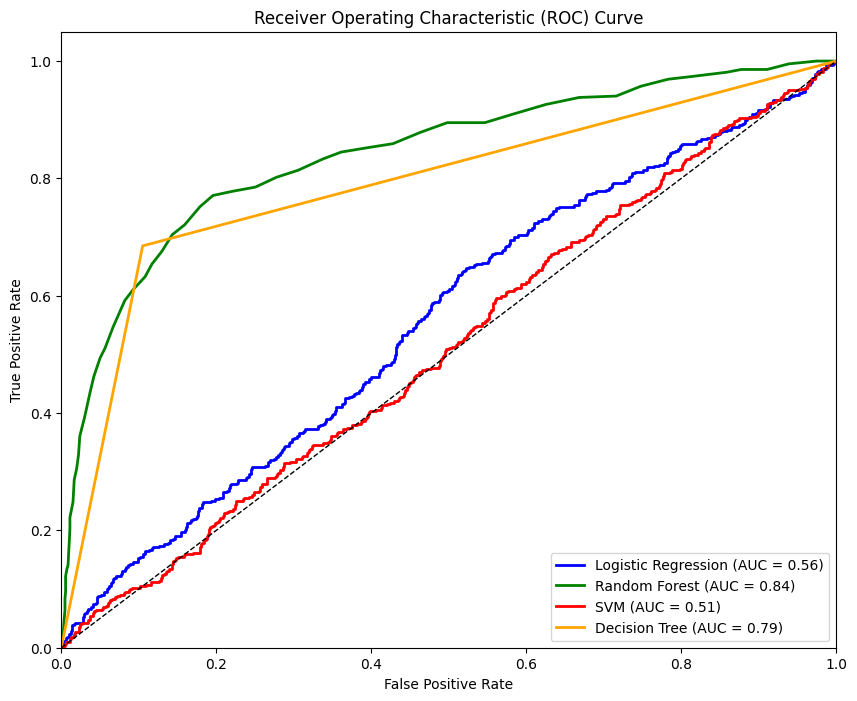

In [542]:
# Instantiate and fit Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)
logistic_scores = logistic_regression.predict_proba(X_test)

# Instantiate and fit Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_scores = random_forest.predict_proba(X_test)

# Instantiate and fit Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_scores = svm.predict_proba(X_test)

# Instantiate and fit Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_scores = decision_tree.predict_proba(X_test)

# Binarize the target variable
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot Logistic Regression ROC curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), logistic_scores.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)

# Plot Random Forest ROC curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), rf_scores.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc)

# Plot SVM ROC curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), svm_scores.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc)

# Plot Decision Tree ROC curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), dt_scores.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='orange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc)

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## **<font color="#D35400">Evaluating Precison-Recall Curves**

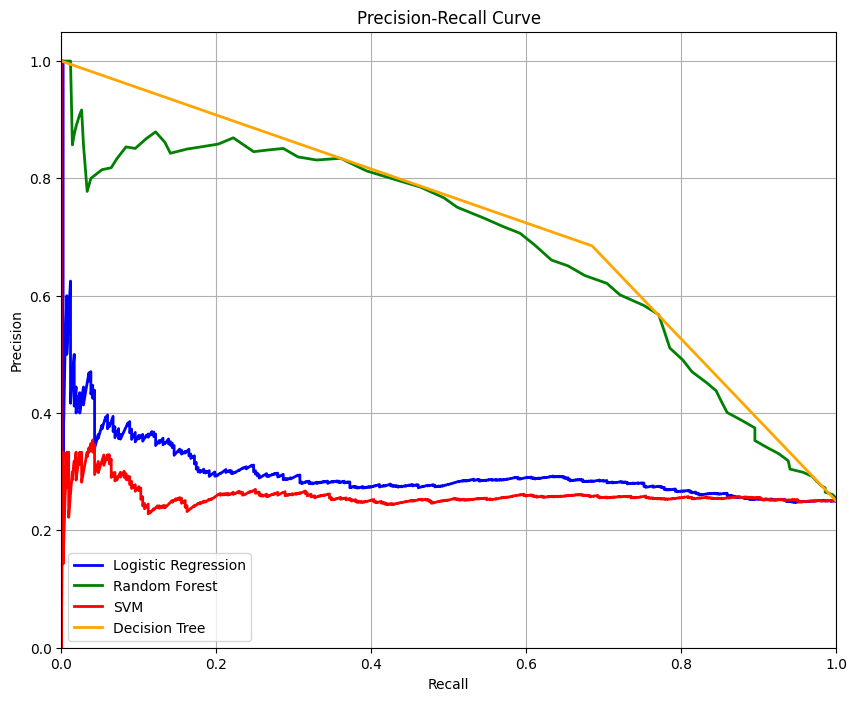

In [543]:
# Calculate precision and recall for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test_bin.ravel(), logistic_scores.ravel())

# Calculate precision and recall for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test_bin.ravel(), rf_scores.ravel())

# Calculate precision and recall for SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test_bin.ravel(), svm_scores.ravel())

# Calculate precision and recall for Decision Tree
precision_dt, recall_dt, _ = precision_recall_curve(y_test_bin.ravel(), dt_scores.ravel())

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))

plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Random Forest')
plt.plot(recall_svm, precision_svm, color='red', lw=2, label='SVM')
plt.plot(recall_dt, precision_dt, color='orange', lw=2, label='Decision Tree')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
